<a href="https://colab.research.google.com/github/ulya1202/NLP/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from wordcloud import WordCloud

In [ ]:
from sklearn.

In [ ]:
import nltk
import spacy

In [ ]:
!pip install emoji

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 590.6/590.6 kB 9.4 MB/s eta 0:00:00


In [ ]:
import re
import emoji

In [ ]:
# !python -m spacy download en_core_web_trf

In [ ]:
import spacy
spacy.require_gpu()  # GPU istifad…ôsini t…ômin edir
nlp = spacy.load('en_core_web_sm')

## Import Dataset

In [ ]:
!curl -L -o twitter-entity-sentiment-analysis.zip  https://www.kaggle.com/api/v1/datasets/download/jp797498e/twitter-entity-sentiment-analysis

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2041k  100 2041k    0     0  5014k      0 --:--:-- --:--:-- --:--:-- 5014k


In [ ]:
!unzip /content/twitter-entity-sentiment-analysis.zip

Archive:  /content/twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
train_data=pd.read_csv('/content/twitter_training.csv')
val_data=pd.read_csv('/content/twitter_validation.csv')
train_data.columns=['id', 'ent', 'sent', 'content']
val_data.columns=['id', 'ent', 'sent', 'content']

In [ ]:
train_data

id          ent      sent  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                 content  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[74681 rows x 4 columns]

# Functions

In [ ]:
def remove_more_95_percentile(data,column):
    data_s=data[column].apply(lambda x: len(x.split()))
    return data[(data_s< np.percentile(data_s,95)) &(data_s>7)]

In [ ]:
def clen_text(text):
    #emoji deyish
   text=emoji.demojize(text)
   #emoji sozu elave et
   text=re.sub(r':([a-zA-Z_]+):', ' EMOJI_\1 ', text)
   #punktuasiyani sil
   text=re.sub(r'[^\w\s_]',' ',text)
   #boshluqlari sil
   text=re.sub(r'\s+',' ',text).strip()

   return text

In [ ]:
def find_EMOJ(text):
    emj=re.findall(r'EMOJI_[a-z_]+',text)
    return emj if  emj else None

In [ ]:
def lem(text):
    doc=nlp(text)
    return ' '.join([wor.lemma_ for wor in doc if not wor.is_stop ])

In [ ]:
def dataset_c(x,y):
    train_data=tf.data.Dataset.from_tensor_slices((x,y))
    train_data=train_data.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
    return train_data


# EDA

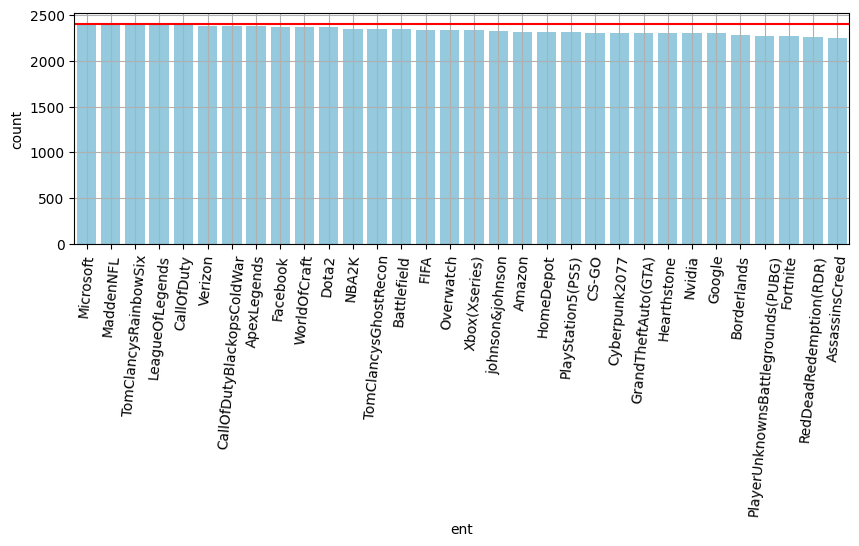

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(train_data['ent'].value_counts(), color='skyblue')
plt.xticks(rotation=85)
plt.grid()
plt.axhline(train_data['ent'].value_counts().max(), color='red');

In [ ]:
our_train_data=train_data[['content','sent']]


In [ ]:
our_train_data.isnull().sum()

content    686
sent         0
dtype: int64

In [ ]:
our_train_data=our_train_data.dropna()

In [ ]:
our_train_data.isnull().sum()

content    0
sent       0
dtype: int64

In [ ]:
our_train_data.duplicated().sum()

np.int64(4227)

In [ ]:
our_train_data=our_train_data.drop_duplicates()

In [ ]:
#neki hem 4 -une de labellenib silirem , umid eedirem duz gerar idi
#eyni komente niye hem irrelevant hem positive hem neytral verilsin ki anlamadim???
our_train_data.describe(include='O')

content      sent
count    69768     69768
unique   69490         4
top         by  Negative
freq         4     21237

In [ ]:
all_4=our_train_data['content'].value_counts()[our_train_data['content'].value_counts()>1]
without_4=our_train_data.drop(our_train_data[our_train_data['content'].isin(all_4.index) ].index)


In [ ]:
without_4.describe()

content      sent
count                                               69353     69353
unique                                              69353         4
top     Just like the windows partition of my Mac is l...  Negative
freq                                                    1     21135

In [ ]:
# space=our_train_data['content'].value_counts().head(1)
# neew=train_data.drop(train_data[train_data['content']==space.index[0]].index )
# neew.describe(include='O')


In [ ]:
# without_4[without_4['content']==without_4['content'].value_counts().head(1).index[0]]

In [ ]:
without_4['sent'].value_counts()

sent
Negative      21135
Positive      19024
Neutral       17000
Irrelevant    12194
Name: count, dtype: int64

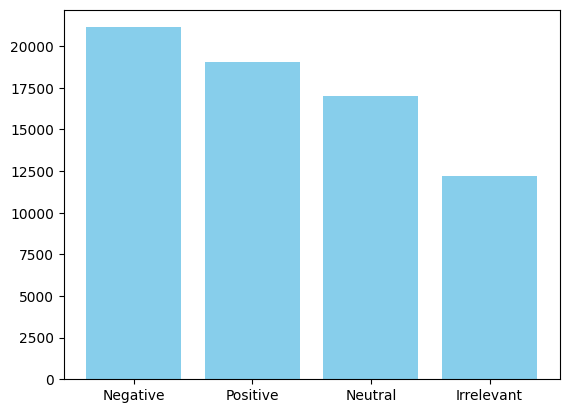

In [ ]:
plt.bar(height=without_4['sent'].value_counts(), x=without_4['sent'].value_counts().index , color='skyblue');

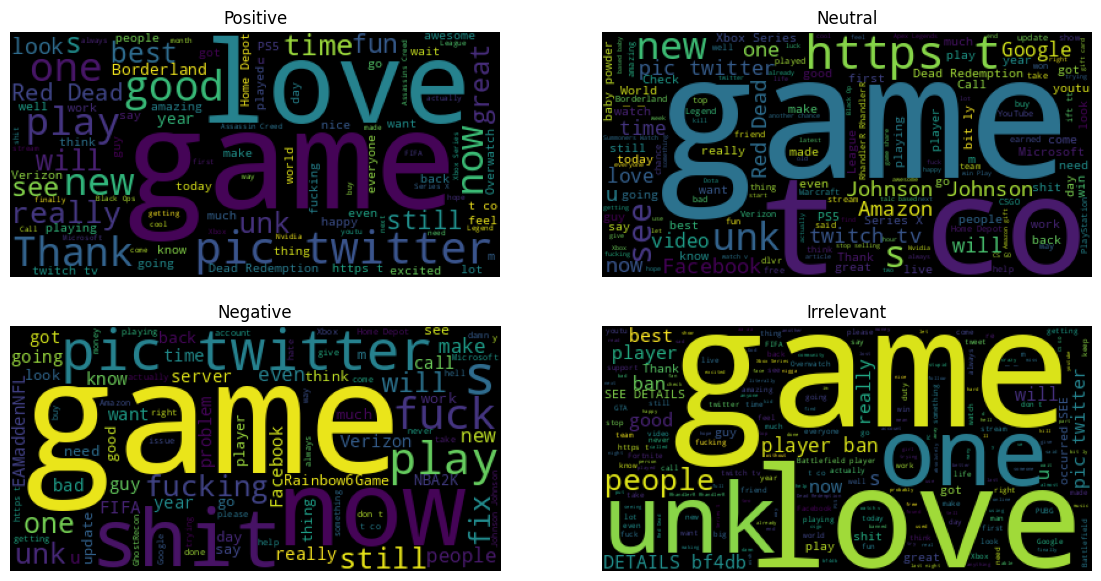

In [ ]:
plt.figure(figsize=(14,7))
for i,content in enumerate(without_4['sent'].unique()):
    world_c=WordCloud().generate(''.join([i for i in without_4[without_4['sent']==content]['content']]))
    plt.subplot(int(np.ceil(len(without_4['sent'].unique())**0.5)),int(np.ceil(len(without_4['sent'].unique())**0.5)),i+1)
    plt.title(f'{content}')
    plt.imshow(world_c)
    plt.axis('off');

# Preprocessing

## clean text from unnecesary symbols

In [ ]:
without_4['content']=without_4['content'].apply(clen_text)

## reduce by frequency

In [ ]:
w_4=without_4['content'].apply(lambda x: x.split())
length=w_4.apply(len)
leng_c=length.value_counts()

In [ ]:
x=leng_c.index
y=leng_c.values

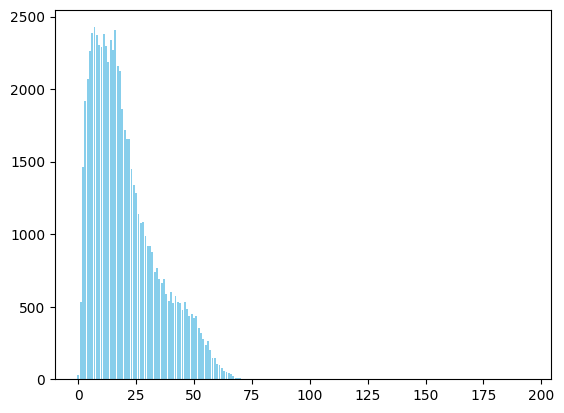

In [ ]:
plt.bar(x,height=y, color='skyblue');

In [ ]:
np.percentile(length,95)

np.float64(49.0)

In [ ]:
without_5=remove_more_95_percentile(without_4,'content')

In [ ]:
without_5['content'].apply(find_EMOJ).isna().sum()

np.int64(52467)

## Lemantization

In [ ]:
without_5['content']=without_5['content'].apply(lem)

<ipython-input-42-2fb18fc90141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_5['content']=without_5['content'].apply(lem)


In [ ]:
without_5['content'].apply(lambda x: len(x.split())).value_counts()

content
7     3764
8     3739
9     3736
6     3562
10    3461
11    3270
12    3248
13    2883
5     2807
14    2643
15    2372
16    2220
17    1839
18    1675
4     1667
19    1436
20    1280
21    1124
22     905
23     779
24     707
3      634
25     530
26     479
27     395
28     313
29     198
30     175
2      145
31     127
32      96
33      63
34      40
35      31
36      27
37      21
39      19
38      12
40      11
1       11
44       9
42       6
41       5
43       2
46       1
Name: count, dtype: int64

In [ ]:
without_5['content']

0                                         come border kill
1                                    m get borderland kill
2                                 m come borderland murder
3                                m get borderland 2 murder
4                                  m get borderland murder
                               ...                        
74676    realize Windows partition Mac like 6 year Nvid...
74677    realize Mac window partition 6 year Nvidia dri...
74678    realize window partition Mac 6 year Nvidia dri...
74679    realize window partition Mac like 6 year Nvidi...
74680    like window partition Mac like 6 year driver i...
Name: content, Length: 52467, dtype: object

In [ ]:
dub_idx=without_5[without_5['content'].duplicated()].index
without_6=without_5.drop(dub_idx, axis=0)

## Dataset

# Model

2. üßπ Preprocessing (T…ômizl…ôm…ô)
Lowercase

Punctuation sil

Stopword removal

Lemmatization (…ôg…ôr klassik modeldirs…ô)

Emoji/reminder silm…ôk (…ôg…ôr sosial mediadƒ±rsa)
3. üî§ Tokenization v…ô Embedding

‚û°Ô∏è Option 1 (Basic): Tokenizer v…ô Embedding Layer (Keras il…ô)

‚û°Ô∏è Option 2 (Advanced): Pretrained embeddings (GloVe, FastText)

‚û°Ô∏è Option 3 (Pro Level): Transformers (BERT, RoBERTa)
4. üß† Model Qurulmasƒ± (RNN | BiLSTM | Attention)
‚úÖ ∆èn heyr…ôtamiz olan kombinasiya: BiLSTM + Attention Layer

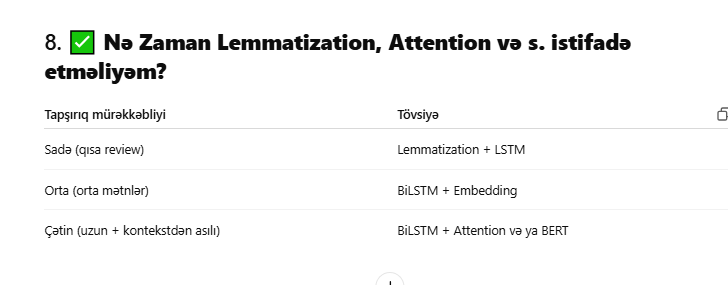

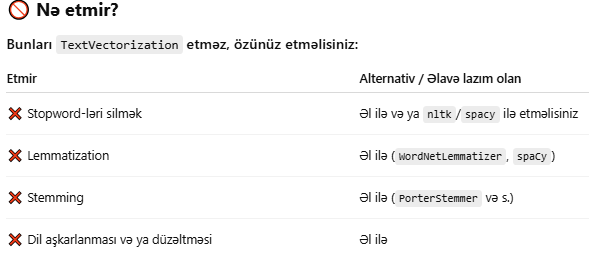

# m

In [ ]:
x=without_6['content']
y=without_6['sent']
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

train_data=dataset_c(x,y)

In [ ]:
x_val=val_data['content']
y_val=val_data['sent']
y_val=label_encoder.transform(y_val)
val_dat=dataset_c(x_val,y_val)

In [ ]:
vocab_size=10_000

text_v=tf.keras.layers.TextVectorization(
    max_tokens=vocab_size,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='int',
    output_sequence_length=100,
    pad_to_max_tokens=True,
    encoding='utf-8',


)


text_v.adapt(x)

text_v.get_vocabulary()[:100]


['',
 '[UNK]',
 np.str_('t'),
 np.str_('s'),
 np.str_('com'),
 np.str_('game'),
 np.str_('play'),
 np.str_('m'),
 np.str_('good'),
 np.str_('like'),
 np.str_('2'),
 np.str_('get'),
 np.str_('pic'),
 np.str_('twitter'),
 np.str_('johnson'),
 np.str_('new'),
 np.str_('love'),
 np.str_('go'),
 np.str_('time'),
 np.str_('unk'),
 np.str_('3'),
 np.str_('player'),
 np.str_('co'),
 np.str_('look'),
 np.str_('people'),
 np.str_('facebook'),
 np.str_('thank'),
 np.str_('fuck'),
 np.str_('shit'),
 np.str_('https'),
 np.str_('amazon'),
 np.str_('great'),
 np.str_('don'),
 np.str_('google'),
 np.str_('win'),
 np.str_('ban'),
 np.str_('year'),
 np.str_('microsoft'),
 np.str_('bad'),
 np.str_('xbox'),
 np.str_('day'),
 np.str_('1'),
 np.str_('4'),
 np.str_('come'),
 np.str_('ve'),
 np.str_('know'),
 np.str_('work'),
 np.str_('dead'),
 np.str_('5'),
 np.str_('verizon'),
 np.str_('k'),
 np.str_('watch'),
 np.str_('want'),
 np.str_('think'),
 np.str_('rhandlerr'),
 np.str_('red'),
 np.str_('fifa'),
 np

In [ ]:
embed_size=300
model=tf.keras.Sequential([
    text_v,
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_size, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(512)), # return_state=True
    tf.keras.layers.Dense(4,activation='softmax', kernel_initializer='glorot_normal')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer= tf.keras.optimizers.Nadam(learning_rate=1e-3),
    metrics = ['accuracy']
)



model.fit(train_data, validation_data=val_dat, epochs=50, batch_size=32)

Epoch 1/50
1511/1511 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 16ms/step - accuracy: 0.7377 - loss: 0.6946 - val_accuracy: 0.4795 - val_loss: 1.3401
Epoch 2/50
1511/1511 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 15ms/step - accuracy: 0.8994 - loss: 0.2885 - val_accuracy: 0.4865 - val_loss: 1.6482
Epoch 3/50
1511/1511 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 16ms/step - accuracy: 0.9477 - loss: 0.1549 - val_accuracy: 0.5696 - val_loss: 1.4567
Epoch 4/50
1511/1511 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 15ms/step - accuracy: 0.9645 - loss: 0.1015 - val_accuracy: 0.5676 - val_loss: 1.8180
Epoch 5/50
1511/1511 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 15ms/step - accuracy: 0.9722 - loss: 0.0794 - val_accuracy: 0.5746 - val_loss: 1.8646
Epoch 6/50
1511/1511 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 16ms/step - accuracy: 0.9770 - loss: 0.0651 - val_accu

In [ ]:
#Chat-gpt komek etdi

prediction_data = tf.data.Dataset.from_tensor_slices(np.array(['hello'])).batch(1)
# Get the prediction from the model for the prediction_data
prediction = model.predict(prediction_data)
# Extract the predicted class index using argmax on the prediction output
predicted_class_index = np.argmax(prediction[0])
# Inverse transform the predicted class index to get the predicted label
predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]
print(f"Predicted Sentiment: {predicted_label}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step
Predicted Sentiment: Negative


In [ ]:


x_val=np.concatenate([x for x,y in val_dat], axis=0)
y_true=np.concatenate([y for x,y in val_dat], axis=0)



In [ ]:
x_val=tf.data.Dataset.from_tensor_slices(x_val).batch(32)

In [ ]:
y_pred=model.predict(x_val)

32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 10ms/step


In [ ]:
# y_pred=np.concatenate([y for y in val_dat], axis=0)
y_pred=np.argmax(y_pred, axis=1)


In [ ]:
original_labels = label_encoder.classes_

<Axes: >

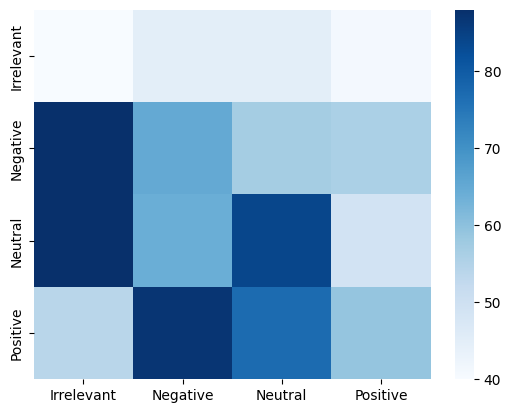

In [ ]:
cm=confusion_matrix(y_true, y_pred)
sns.heatmap(cm,cmap='Blues',xticklabels=original_labels, yticklabels=original_labels);

In [ ]:
print(classification_report(y_true, y_pred, target_names=original_labels))

              precision    recall  f1-score   support

  Irrelevant       0.15      0.23      0.18       171
    Negative       0.25      0.24      0.25       266
     Neutral       0.32      0.29      0.31       285
    Positive       0.29      0.21      0.24       277

    accuracy                           0.25       999
   macro avg       0.25      0.25      0.24       999
weighted avg       0.26      0.25      0.25       999

